<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/NLP_Basics_B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Basics
FTW Batch 8

**Agenda**:
1. Introduction to NLP
2. Tokenization (and NLP Data Prep)
3. Bag-of-Words Representation
4. Simple Example of NLP Data Cleaning and BOW Representation

## Introduction to NLP




### Data Preprocessing and EDA with NLTK


In [42]:
from IPython.display import clear_output
import pandas as pd
import nltk
from nltk.text import Text
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('book')
clear_output()

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
print(text1)
print(text2)
print(text3)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>
<Text: The Book of Genesis>


### How can we search within the text?
We can examine the "context" in which a word occurs using concordance.

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text1.concordance(["Moby", "Dick"])

Displaying 25 of 83 matches:
[ Moby Dick by Herman Melville 1851 ] ETYMOLOG
le must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . "
same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye know the
l . Death and devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby 
 , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," 
 Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," said Starbuck
. " Captain Ahab , I have heard of Moby Dick -- but it was not Moby Dick that t
ard of Moby Dick -- but it was not Moby Dick that took off thy leg ?" " Who tol
e , my hearties all round ; it was Moby Dick that dismasted me ; Moby Dick that
 was Moby Dick that dismasted me ; Moby Dick that brought me to this dead stump
he white whale ; a sharp lance for Moby Dick !" " God bless ye ," he seemed to 
the white whale ? art not game for Moby Dick ?" " I am game for his crooked jaw
hful whaleboat ' s bow -- Death to Moby Dick

In [6]:
# we can store these results in a concordance list:
con_list = text1.concordance_list("monstrous")
print(len(con_list))
print(con_list[3].line)

11
d as you gazed , and wondered what monstrous cannibal and savage could ever hav


Where is the location of a word within the text?

- Lexical Dispersion Plot for Words in U.S. Presidential Inaugural Addresses: This can be used to investigate changes in language use over time.
- Each stripe represents an instance of a word, and each row represents the entire text.
- Striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end).

<Text: Inaugural Address Corpus>


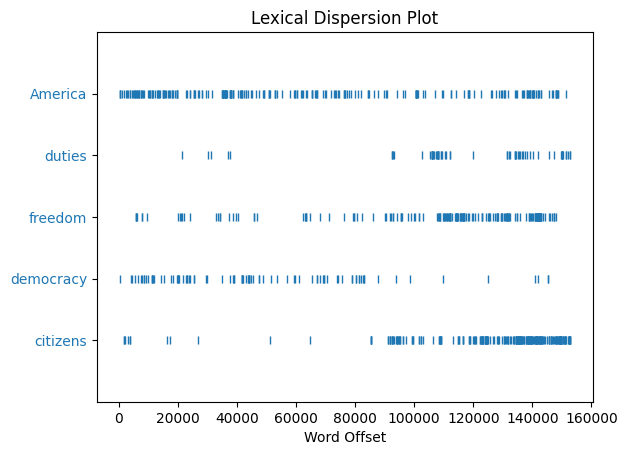

In [7]:
print(text4)
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### Counting Vocabulary

What is the length of a text from start to finish, in terms of the words and punctuation symbols that appear.

A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group

In [8]:
print(text1)
len(text1)

<Text: Moby Dick by Herman Melville 1851>


260819

In [9]:
print(text3)
len(text3)

<Text: The Book of Genesis>


44764

How lexically "rich" is the text?
- what portion of the tokens are unique?

In [10]:
len(set(text1)) / len(text1)

0.07406285585022564

We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word

In [11]:
text1.count("Moby")

84

In [12]:
100 * text1.count('Moby') / len(text1)

0.032206242643365704

### Simple Statistics with Text: Frequency Distributions

- can we automatically identify the words of a text that are most informative about the topic and genre of the text?

In [22]:
print(text1.tokens[:20])

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'a', 'Grammar']


In [25]:
fdist1 = FreqDist(text1)
print(fdist1)


<FreqDist with 19317 samples and 260819 outcomes>


- It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items

In [27]:
fdist1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [28]:
fdist1['whale']

906

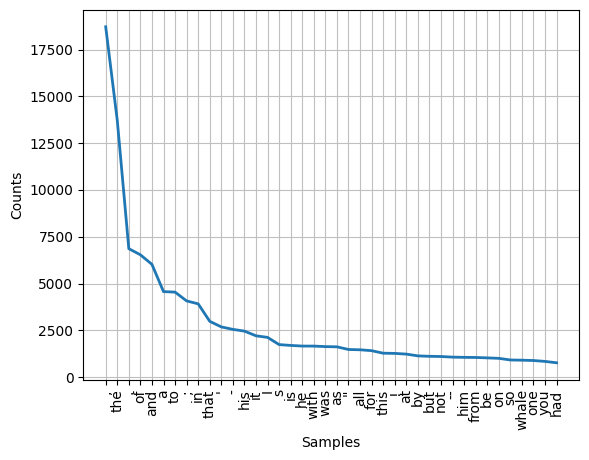

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
fdist1.plot(40)

## Tokenization

- How can we represent words in a way that a computer can process them?
- Splitting text into smaller units

In [14]:
sentence = """I am learning so much during my time at FTW! I love data science"""
tokens = nltk.word_tokenize(sentence)
tokens

['I',
 'am',
 'learning',
 'so',
 'much',
 'during',
 'my',
 'time',
 'at',
 'FTW',
 '!',
 'I',
 'love',
 'data',
 'science']

In [49]:
text = "I love learning data science at FTW"
tokenizer = CountVectorizer().build_tokenizer()
print(tokenizer(text))

['love', 'learning', 'data', 'science', 'at', 'FTW']


## BOW Representation

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "The caged bird sings with a fearful trill",
    "for the caged bird sings of freedom",
    "I really really really like ice cream"
]
cv = CountVectorizer()
count_matrix = cv.fit_transform(texts)
count_array = count_matrix.toarray()

# Create a dataframe of the word counts to inspect
# - todense transforms the dtm into a dense matrix
# - get_feature_names() gives a list words
pd.DataFrame(count_matrix.todense(), columns=cv.get_feature_names_out())

,bird,caged,cream,fearful,for,freedom,ice,like,of,really,sings,the,trill,with
0,1,1,0,1,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,1,1,0,0,1,0,1,1,0,0
2,0,0,1,0,0,0,1,1,0,3,0,0,0,0
